In [2]:
demand = []
cdemand = [] # TODO 这个cdemand是啥
fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/historydemand/slot20/groundtruth/24', 'r')
for line in fopen:
    line = line.strip().split(',')
    csum = 0
    one = []
    for k in line:
        one.append((float(k)))
        csum += (float(k))
    demand.append(csum) # 37 每个line所有的数据加起来是csum 从i出去的demandd
    cdemand.append(one) # 37x37 i到j的demand
fopen.close()

In [10]:
def createa(a,b,c):
    a += 1
    b += 1
    c += 12
    return a,b,c

def createb(a,b,c):
    a += 5
    b += 8
    return a,b,c


a,b,c = 1,1,1
d,e,f = createa(a,b,c)
print(d,e,f)
g,h,i = createb(a,b,c)
print(g,h,i)

2 2 13
6 9 1


In [34]:
b = [2,8,9,10,3,5]

In [36]:
a = [0,1,2,3,4,5]
# energy = {}
# for i in range(len(a)):
#     energy
a = sorted(a,key = lambda x:b[x])
a

[0, 4, 5, 1, 2, 3]

In [37]:
import pandas as pd

# 从字典创建 DataFrame
data = {'name': ['Alice', 'Bob', 'Charlie', 'David'],
        'age': [25, 32, 18, 47],
        'country': ['US', 'UK', 'Canada', 'Australia']}
df = pd.DataFrame(data)
print(df)


      name  age    country
0    Alice   25         US
1      Bob   32         UK
2  Charlie   18     Canada
3    David   47  Australia


In [38]:
df['name'][1]

'Bob'

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

legend_font = {"family" : "Times New Roman","size":22}

In [13]:
'''Served Passenger 处理， 保留每个timeslot的passenger serve情况'''
def passengerServeNew(exp,file_no,season):
    if exp == 'beta':
        fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/resultdata/beta/chargestatus/passenger-served-'+str(file_no), 'r')
    elif exp == 'baseline':
        fopen = open('/Users/zihanding/Developer/Yukun/newevaluation/resultdata/beta/chargestatus/passenger-served-'+str(file_no), 'r')
    else:
        return 'Please provide valid experiment type.'#     passenger_served_ratio = []
    
    result_served = [] # served passenger 54*37*37
    result_total = [] # total passenger demand 54*37*37
    count = 0
    ab = 0
    temp_s = []
    temp_t = []
    
    for line in fopen:
        if count == 37:
            if ab ==0:
                result_served.append(temp_s)
                temp_s = []
                ab = 1
            else:
                result_total.append(temp_t)
                temp_t = []
                ab = 0
            count = 0
        count += 1
        line = line.strip()[1:-1].split(',')
        for i in range(0,len(line)):
            line[i] = float(line[i])
        if ab == 0:
            temp_s.append(line)
        else:
            temp_t.append(line)
    if ab ==0:
        result_served.append(temp_s)
        temp_s = []
        ab = 1
    else:
        result_total.append(temp_t)
        temp_t = []
        ab = 0
    
    fopen.close()
    
    #result_served,result_total 54*37*37矩阵 分别是每个timeslot从i到j的passenger served和passenger demand
    return result_served, result_total

def passenger_serve(exp,file_no,season):
    served, demand = passengerServeNew(exp,file_no,season)
    result = []
    
    for i in range(len(demand)):
        ratio = []
        for j in range(len(demand[0])):
            cs,cd = 0,0
            for k in range(len(demand[0][0])):
                cs += served[i][j][k]
                cd += demand[i][j][k]
            if cd == 0:
                if cs !=0:
                    print('error!!!!!')
                ratio.append(1.0)
            else:
                ratio.append(cs/cd)
        result.append(ratio)
    return result
    
    #result 54*37的矩阵 每个timeslot，每个region的passenger serve情况
    
def passenger_serve_totalratio(exp,file_no,season):
    served, demand = passengerServeNew(exp,file_no,season)
    result = []
    for i in range(len(demand)):
        cs, cd = 0,0
        for j in range(len(demand[0])):
            for k in range(len(demand[0][0])):
                cs += served[i][j][k]
                cd += demand[i][j][k]
        if cd == 0:
            result.append(1.0)
        else:
            result.append(cs/cd)
    return result

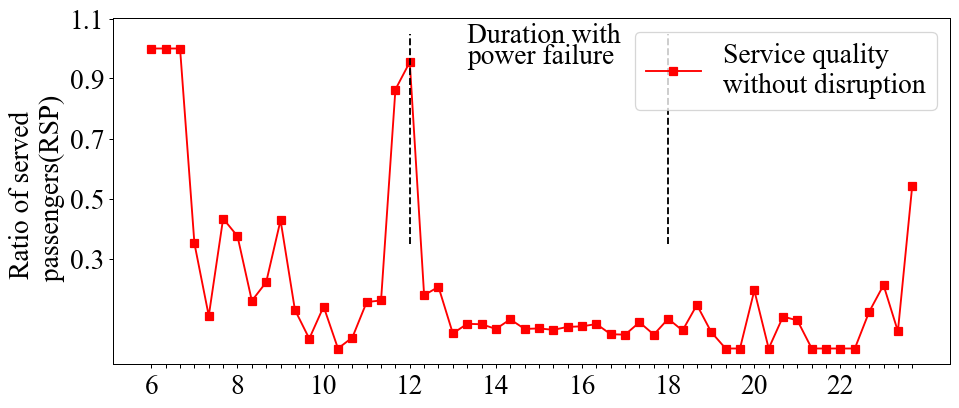

In [196]:
def figuretest():
    
    disruption = 32
    
    x = [m for m in range(18, 72)]
    res_dis = passenger_serve('beta',0,'Summer')
    
    y_dis_area=[]
    for i in range(len(res_dis)):
        y_dis_area.append(res_dis[i][disruption])
        
    y_dis_area = region_ratio
    plt.figure(figsize=(12,5),dpi=90)
    
    plt.plot(x,y_dis_area,'s-',color = 'r',label="Service quality \nwithout disruption")
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
#     plt.ylim(0.3, 1.1) 
    plt.vlines([36, 54], 0.35, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
    plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')
figuretest()

In [219]:
# result: 1* 54
region = 32
region_ratio = []

for x in range(18,21):
    cs,cd = generate_sd(4,x)
#     for j in range(37):
    s = sum(cs[region][j] for j in range(37))
    d = sum(cd[region][j] for j in range(37))
    print(s,d)
    if d == 0 or s>d:
        region_ratio.append(1.0)
    else:
        region_ratio.append(s/d)
region_ratio

11.0 3.284739454094
15.0 4.296345237681001
17.0 6.887071885917


[1.0, 1.0, 1.0]

In [197]:
s = [0.0, 0.0, 0.8787023084801611, 0.0, 1.0, 1.0, 1.0, 0.5835024748618237, 0.0, 0.2546701449038199, 0.2949929178470499, 0.4849198649536628, 1.0, 0.9353433980506123, 0.24582743153890615, 0.7659465235318189, 0.0, 0.3687411473085858, 0.2949929178466148, 0.0, 1.0, 0.5363507597219089, 0.1594556312685485, 0.637822525074194, 0.19887163000911526, 0.570954034542134, 0.19666194523130218, 0.24582743153920827, 0.0, 0.22691762911298657, 0.7792265754446038, 0.07866477809251571, 0.42610088133441826, 0.03333253309002603, 0.06704384496521613, 0.018494853783524366, 0.0]

In [199]:
s[32]

0.42610088133441826

In [ ]:
def figure1ServedPassenger():
    '''Disruption Happened in [32,6,2,1] in Summer 12pm to 6pm (Timeslot 36 to 54), Compared with baseline'''
    '''Passenger Served'''
    # res = passenger_serve('beta',25,'Summer')

    disruption = 32

    #data
    x = [m for m in range(18, 72)]
    res_dis = passenger_serve('beta',41,'Summer')
    res_base = passenger_serve('baseline',9,'Noseason')
    res_dis_winter = passenger_serve('beta',32,'Winter')

    y_dis_area,y_base,y_dis_win = [],[],[]
    for i in range(len(res_dis)):
        y_dis_area.append(res_dis[i][disruption])
        y_base.append(res_base[i][disruption])
        y_dis_win.append(res_dis_winter[i][disruption])
    # y_dis = passenger_serve_totalratio('beta',25,'Summer')

    #figure plot
    plt.figure(figsize=(12,9),dpi=90)
#     plt.title('Service Quality in Central Region',fontsize = 15 )

    plt.subplot(2,1,1)
    plt.plot(x,y_base,'s-',color = 'r',label="Service quality \nwithout disruption")
    plt.plot(x,y_dis_area,'^--',color = 'black',label="Service quality \nwith disruption (slot 1)")
#     plt.plot(x,y_dis_win,'o-',color = 'b',label="RSP in Disruption Area (Slot 2)")
    # plt.plot(x,result_disrupt_winter,'^-',color = 'g',label = 'disruption_winter')
#     plt.xlabel("Time of day (hour)",fontproperties = legend_font)
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
    plt.ylim(0.3, 1.1) 
    plt.vlines([36, 54], 0.35, 1.05, linestyles='dashed', colors='black')
#     x = range(6,24,1)
    # plt.xlim(6,24)
    xt = range(18,72,6)
    yt = [int(x/3) for x in xt]
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2),fontproperties = legend_font)
#     plt.grid(linestyle = '--', linewidth = 0.4)
    plt.legend(loc = "best",prop = legend_font)#图例
    plt.text(40,1.02,'Duration with', fontproperties = legend_font,color = 'black')
    plt.text(40,0.95,'power failure', fontproperties = legend_font,color = 'black')
    
    
    
    plt.subplot(2,1,2)
    plt.plot(x,y_base,'s-',color = 'r',label="Service quality \nwithout disruption")
    plt.plot(x,y_dis_win,'o-',color = 'b',label="Service quality \nwith disruption (slot 2)")
    plt.xlabel("Time of day (hour)",fontproperties = legend_font)
    plt.ylabel("Ratio of served \n passengers(RSP)",fontproperties = legend_font)
#     plt.title("Ratio of Served Passengers (RSP) in Disruption area")
    plt.ylim(0.3, 1.1) 
    plt.vlines([48, 60], 0.35, 1.05, colors='blue')
    plt.xticks(xt,yt,fontproperties = legend_font)
    plt.xticks(x,fontproperties = legend_font)
    plt.yticks(np.arange(0.3, 1.2, step=0.2), fontproperties = legend_font)
    plt.legend(loc = "best",prop = legend_font)#图例
    
    
    plt.text(49,1.02,'Duration with', fontproperties = legend_font,color = 'b')
    plt.text(49,0.95,'power failure', fontproperties = legend_font,color = 'b')


    plt.show()
figure1ServedPassenger()

In [187]:
len(cd[1])

37

In [184]:
def generate_sd(round,time):
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/resultdata/fairness_beta/supply/round-'+str(round)+'/'+str(time), 'r')
    csupply = []
    for line in fopen:
        line = line.strip()[1:-1]
        line = line.split(',')
        for i in range(len(line)):
            line[i] = float(line[i])
        csupply.append(line)

    cdemand = []
    fopen1 = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/resultdata/fairness_beta/demand/round-'+str(round)+'/'+str(time), 'r')
    for line in fopen1:
        line = line.strip()[1:-1]
        line = line.split(',')
        for i in range(len(line)):
            line[i] = float(line[i])
        cdemand.append(line)
    return csupply,cdemand # 37*37

In [170]:
cs,cd = generate_sd(0,23)
n = 0
for i in range(37):
    if sum(cs[i]) < sum(cd[i]):
        print(sum(cs[i])/ sum(cd[i]))
        n += 1
print(n)

0.4126834921455017
0.07092997521241252
0.6547382327305442
0.5328999876833499
0.03337881186463393
0.34046388102003894
0.0
0.20326201851926098
0.0
0.0
0.0
0.07964067392292078
0.0
0.19455078915427013
0.1840345302811699
0.22697592068002598
0.3782932011333766
0.19455078915423235
0.15475630955463504
0.0
0.23480267656598516
0.0
0.24911991294122302
0.0
0.1238050476436352
0.0
0.1973703658084991
0.0
0.2589078943116022
0.23279581608198308
30


In [175]:
sum(sum(cs[i][j] for j in range(37))for i in range(37))

87.0

In [176]:
sum(sum(cd[i][j] for j in range(37))for i in range(37))

430.3051344364989

In [182]:
region_ratio

[1.4970504915853975,
 1.0572293358509297,
 0.675024669258213,
 0.37147650458473636,
 0.28562402322741587,
 0.2829339731466953,
 0.17562959960769128,
 0.13274343688155255,
 0.055752312983236026,
 0.16198195631665793,
 0.07260045094523178,
 0.06317079416043951,
 0.05420768040065666,
 0.07908724510731809,
 0.05729956941154091,
 0.06689448540291541,
 0.12199861273492286,
 0.07320132443378875,
 0.6696396689790396,
 0.5232630219586962,
 0.48498640702740375,
 0.3880966938000703,
 0.4743739486660329,
 0.32022757151609926,
 0.3284478692410886,
 0.3212825537002472,
 0.22849200766786137,
 0.3442020087820293,
 0.2954863078376644,
 0.3174570157908147,
 0.3798426852909977,
 0.28949356939608795,
 0.340243505700655,
 0.4177812469850948,
 0.4796301652660027,
 0.37036592809400043,
 0.33724688181630097,
 0.19049322232175997,
 0.13655054116522158,
 0.12900998011156697,
 0.07591303595042813,
 0.044346208774498526,
 0.1801121967989052,
 0.1652236912071189,
 0.15736204324811834,
 0.11436640641190411,
 0.0603

0.4126834921455017
0.10639496281861878
0.06547382327305441
0.059211109742594435
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.19455078915427013
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
36


# 将初始状态写入csv避免每次从头读文件很慢

In [42]:
def obtain_regions():
    # obtain region and charging stations infomation
    # input:
    # output:
    #         n: number of regions
    #         p: number of charging poles in each region: List<>[]
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/datadir/chargerindex', 'r')
    p = {}  # number of charging poles in each region
    n = 0  # number of regions
    for k in fopen:
        k = k.strip().split(',')
        p[n] = int(float(k[-1]) / 5)
        n += 1
    return n, p

In [45]:
def exp_config():
    # experiment setup
    # input:
    # output:
    #         L:
    #         L1:
    #         L2:
    #         LK:
    L1 = RIDING_ENERGY
    L2 = CHARGING_ENERGY
    L = TOTAL_ENERGY
    K = L / L2

    return L, L1, L2, K


In [56]:
def gps_to_region(gps):
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/datadir/chargerindex', 'r')
    chargergps = []
    for k in fopen:
        k = k.split(',')
        chargergps.append([float(k[0]), float(k[1])])
    near = 1000
    loc = 0
    for i in range(len(chargergps)):
        cgps = chargergps[i]
        if abs(cgps[0] - gps[0]) + abs(cgps[1] - gps[1]) < near:
            loc = i
            near = abs(cgps[0] - gps[0]) + abs(cgps[1] - gps[1])
    return loc


def get_middle_region(current, future, costtime):
    fopen = open('/Users/zihanding/Developer/Psquare/newevaluation_dis/datadir/chargerindex', 'r')
    chargergps = []
    for k in fopen:
        k = k.split(',')
        chargergps.append([float(k[0]), float(k[1])])
    startx = chargergps[current][0]
    starty = chargergps[current][1]
    endx = chargergps[future][0]
    endy = chargergps[future][1]
    middlex = startx + (endx - startx) / costtime
    middley = starty + (endy - endx) / costtime
    return gps_to_region([middlex, middley])

In [57]:
import os
from datetime import datetime
def obtain_vehicles():
    """
    obtain initial vehicle information
    :param energystatus:
    :param location:
    :param occupancystatus:
    :return: num_of_v number of vehicles
    """

    energystatus = []  # 车辆energy level
    location = []  # 车辆timeslot结束时目前位置
    occupancystatus = []  # 是否载客

    # path = '/Users/jiangxiao/Desktop/data/ev/20161213/'
    path = '/Users/zihanding/Developer/Psquare/newevaluation/datadir/ev/20161213/'

    #  读取多文件中的充电时间信息
    # 每个file代表一辆车
    for root, dirs, files in os.walk(path):
        cvalue = 0
        for file in files:
            chargingtime = []
            fopen = open(path + file, 'r')
            for k in fopen:
                k = k.strip().split(',')
                start = int(k[0])
                end = int(k[1])
                if end - start > 30:
                    chargingtime.append([start, end])
            fopen.close()
            # 如果没有充电时间》30的energystatus就说是满足了80%的电量
            if len(chargingtime) == 0:
                energystatus.append(int((0.8) / (1 / 15.0)))
            else:
                energystatus.append(cvalue % 6 + 8)
            cvalue += 1

            gpspath = '/Users/zihanding/Developer/Psquare/newevaluation/datadir/evgps/20161213/' + file
            if os.path.isfile(gpspath):
                fopen = open(gpspath, 'r')
                gpsrecord = []
                for k in fopen:
                    k = k.strip()
                    gpsrecord.append(k)
                fopen.close()
                gps = []
                # 处理文件：6点之后的才要
                for line in gpsrecord:
                    line = line.strip().split(',')
                    ctime = datetime.strptime(line[4], '%Y-%m-%dT%H:%M:%S.000Z')
                    if (ctime.hour >= 6):
                        gps.append(float(line[2]))
                        gps.append(float(line[3]))
                if len(gps) == 0:
                    print(file)
                else:
                    # 得到车的位置信息
                    location.append(gps_to_region(gps))

            # 读取汽车使用情况的文件，里面存的应该是汽车被占用的时间段，如果属于6-24就放到occupancystatus
            # dealpath = '/Users/jiangxiao/Desktop/data/evdeal/20161213/' + file
            dealpath = '/Users/zihanding/Developer/Psquare/newevaluation/datadir/evdeal/20161213/' + file
            if os.path.isfile(dealpath):
                fopen = open(dealpath, 'r')
                dealrecord = []
                for k in fopen:
                    k = k.strip().split(',')
                    ctime1 = datetime.strptime(k[1], '%Y-%m-%dT%H:%M:%S.000Z')
                    ctime2 = datetime.strptime(k[2], '%Y-%m-%dT%H:%M:%S.000Z')
                    dealrecord.append([ctime1.hour * 60 + ctime1.minute, ctime2.hour * 60 + ctime2.minute])
                occu = 0
                for ck in dealrecord:
                    if ck[0] <= 360 and ck[1] > 360:
                        occu = 1
                occupancystatus.append(occu)
            else:
                occupancystatus.append(0)
    num_of_v = len(energystatus)
    return energystatus, location, occupancystatus, num_of_v


In [59]:
n,p = obtain_regions()
# L,L1,L2,K = exp_config()

# timehorizon = future

energystatus, location, occupancystatus, num_of_v = obtain_vehicles()

chargingstatus = [0]*num_of_v #是否在充电 (1,waiting for free charging point) (2, charging) (0,not charging) (3, heading to charging)
remainingchargingtime = [0]*num_of_v #剩余充电时间
remainingtriptime = [0]*num_of_v #剩余trip 时间
destination = [0]*num_of_v # 目的地
chargestation = [-1]* num_of_v # 充电region 没有的时候置-1
idledrivingtime = [0]*num_of_v #  等待充电时间 idle driving + waiting for charging
withoutwaitingtime = [0] * num_of_v # idle driving
dispatchedtime = [-1] * num_of_v # dispatch去充电的开始时间戳
dispatchservingtime = [-1] * num_of_v
updatestatus = [0] * num_of_v


print("number of vehicles: ", len(vehicles))

NameError: name 'vehicles' is not defined

In [90]:
dct = {
    "id": [x for x in range(num_of_v)],
    "energy": energystatus,
    "location": location,
    "occupy_status": occupancystatus,
    "charging_status": chargingstatus,
    "charging_station": chargestation,
    "remain_charging_time": remainingchargingtime,
    "remain_trip_time": remainingtriptime,
    "destination": destination,
    "idle_driving_distance": idledrivingtime,
    "total_waiting_time": withoutwaitingtime,
    "dispatched_charging_time": dispatchedtime,
    "dispatched_serving_time": dispatchservingtime,
    "update_status": updatestatus
}
vehicles = pd.DataFrame(dct)

In [100]:
dct = {
    "id": [x for x in range(num_of_v)],
    "energy": energystatus,
    "location": location,
#     "occupy_status": occupancystatus,
    "vehicle_status": chargingstatus, # (0:C), (1:S), (2:O)
#     "charging_station": chargestation,
#     "remain_charging_time": remainingchargingtime,
    "remain_trip_time": remainingtriptime,
    "destination": destination,
#     "idle_driving_distance": idledrivingtime,
#     "total_waiting_time": withoutwaitingtime,
    "dispatched_charging_time": dispatchedtime,
    "dispatched_serving_time": dispatchservingtime,
    "update_status": updatestatus
}
vehicles = pd.DataFrame(dct)

In [101]:
vehicles.to_csv("/Users/zihanding/Developer/Psquare/newevaluation_dis/datadir/vehicles_initial.csv",index = False)

In [102]:
vehicles = pd.read_csv('/Users/zihanding/Developer/Psquare/newevaluation_dis/datadir/vehicles_initial.csv')

In [108]:
vehicles

,id,energy,location,vehicle_status,remain_trip_time,destination,dispatched_charging_time,dispatched_serving_time,update_status
0,0,8,20,0,0,0,-1,-1,0
1,1,12,32,0,0,0,-1,-1,0
2,2,10,7,0,0,0,-1,-1,0
3,3,11,7,0,0,0,-1,-1,0
4,4,12,0,0,0,0,-1,-1,0
...,...,...,...,...,...,...,...,...,...
721,721,9,33,0,0,0,-1,-1,0
722,722,10,8,0,0,0,-1,-1,0
723,723,12,0,0,0,0,-1,-1,0
724,724,12,18,0,0,0,-1,-1,0


In [106]:
x = vehicles.iloc[1]['id']

1

charging status:

0: not charging  
1: charging  
2: waiting for charing  


In [ ]:
df['occupy_status'] = 

In [89]:
vehicles[vehicles['occupy_status'] == 1]

,id,energy,location,occupy_status,charging_status,charging_station,remain_charging_time,remain_trip_time,destination,idle_driving_distance,total_waiting_time,dispatched_charging_time,dispatched_serving_time,update_status
8,8,10,33,1,0,-1,0,0,0,0,0,-1,-1,0
35,35,13,15,1,0,-1,0,0,0,0,0,-1,-1,0
55,55,9,21,1,0,-1,0,0,0,0,0,-1,-1,0
85,85,9,26,1,0,-1,0,0,0,0,0,-1,-1,0
93,93,11,0,1,0,-1,0,0,0,0,0,-1,-1,0
185,185,13,36,1,0,-1,0,0,0,0,0,-1,-1,0
208,208,12,35,1,0,-1,0,0,0,0,0,-1,-1,0
241,241,9,29,1,0,-1,0,0,0,0,0,-1,-1,0
256,256,12,27,1,0,-1,0,0,0,0,0,-1,-1,0
468,468,8,3,1,0,-1,0,0,0,0,0,-1,-1,0


In [76]:
for i in range(len(vehicles)):
    if vehicles['location'][i] == 16:
        print("yes")

yes
yes
yes
yes
yes
yes
yes


In [ ]:
    inputdemand =[]
    for i in range(n):
        one=[]
        for j in range(K):
            one.append(0)
        inputdemand.append(one)

    for k in range(K):

        fopen = open('./historydemand/slot20/prediction/'+str(k+starttimeslot),'r')
        loc =0
        for line in fopen:
            line =line.strip('\n')
            line = line.split(',')
            valuesum =0
            for value in line:
                valuesum = valuesum + float(value)*1.15
            inputdemand[loc][k]= valuesum
            loc = loc+1
    demand={}
    for i in range(n):
        for k in range(K):
            demand[i,k] = inputdemand[i][k]
#---------------------------------------------